# Transimpedance Amplifier Design Tools

The notebook contains simple Transimpedance Amplifier Design (TIA) tools based on calculations from our Electrical Engineering Design Project 2 Lectures delivered by David Powell.

The transfer function of a compensated TIA is given as:

$\frac{V_{out}}{I_{pd}} = \frac{R\omega_0}{s^2(C_J+C_{fb})R + s(1+C_{fb}R\omega_0) + \omega_0}$

Where:
$\omega_0$ is the opamps unity gain frequency

$C_J$ is photodiode PN junction capacitance

$C_{fb}$ is feedback capacitance

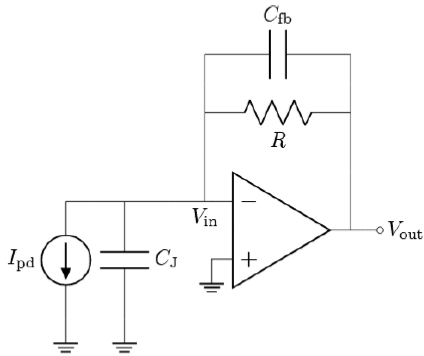

## Analysis of Feedback Resistor Value

The feedback resistor is directly proportional to transimpedance gain. For example a 1M resistor has a transimpedance gain of 120 dB (10e6).

c:\Users\navni\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


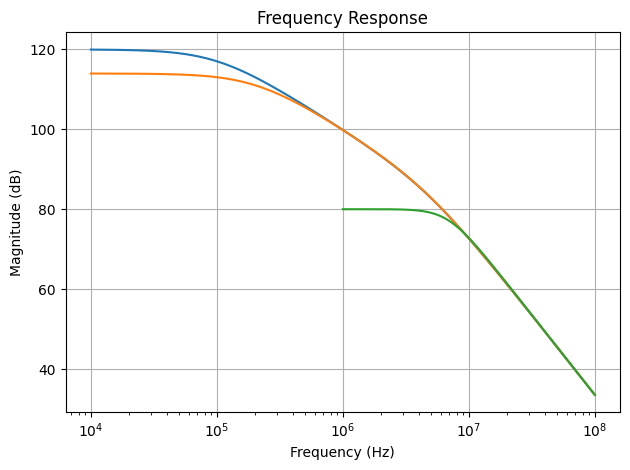

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define component parameters
w = 10 * 10 ** 6        # MCP6022 GBP is 10 MHz
Cj = 11 * 10 ** (-12)   # SFH 203 Junction capacitance


# Define function to generate frequency response
def freqResp(Rfb, Cfb):
    numerator = [(Rfb * w)]  # numerator coefficients
    denominator = [((Cj + Cfb)* Rfb), (1+Cfb*Rfb*w), w]  # denominator coefficients

    # Create a transfer function
    sys = signal.TransferFunction(numerator, denominator)

    # Generate frequency response
    freq, mag = signal.freqresp(sys)
    return freq, mag

# Generate frequency response
freq1, mag1 = freqResp(Rfb = 1000 * 10 ** 3, Cfb =10 * 10 ** (-12))
freq2, mag2 = freqResp(Rfb = 500 * 10 ** 3, Cfb =10 * 10 ** (-12))
freq3, mag3 = freqResp(Rfb = 10 * 10 ** 3, Cfb =10 * 10 ** (-12))

# Plot Bode magnitude plot
plt.figure()
plt.semilogx(freq1, 20*np.log10(mag1))
plt.semilogx(freq2, 20*np.log10(mag2))
plt.semilogx(freq3, 20*np.log10(mag3))
plt.title('Frequency Response')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid()

plt.tight_layout()
plt.show()

## Analysis of Compensation Capacitor

A compensation capacitor is typically added to a circuit to prevent overshoot. However, due to high GBP of the MCP6021/MCP6022 Op-Amps, the overshoot occurs at frequencies outside of the operating range (20 - 50 kHz).

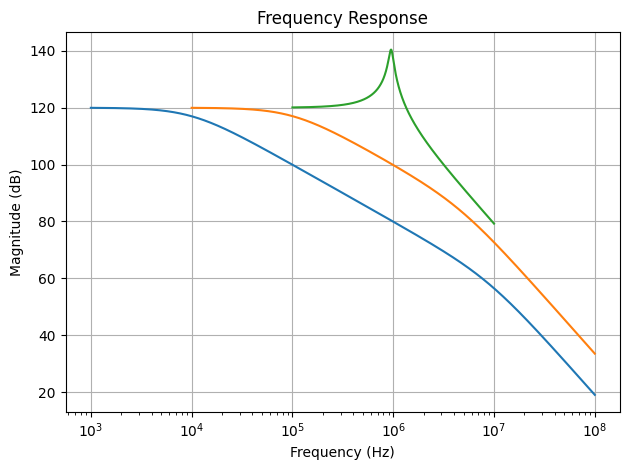

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define component parameters
w = 10 * 10 ** 6        # MCP6022 GBP is 10 MHz
Cj = 11 * 10 ** (-12)   # SFH 203 Junction capacitance


# Define function to generate frequency response
def freqResp(Rfb, Cfb):
    numerator = [(Rfb * w)]  # numerator coefficients
    denominator = [((Cj + Cfb)* Rfb), (1+Cfb*Rfb*w), w]  # denominator coefficients

    # Create a transfer function
    sys = signal.TransferFunction(numerator, denominator)

    # Generate frequency response
    freq, mag = signal.freqresp(sys)
    return freq, mag

# Generate frequency response
freq1, mag1 = freqResp(Rfb = 1000 * 10 ** 3, Cfb =100 * 10 ** (-12))
freq2, mag2 = freqResp(Rfb = 1000 * 10 ** 3, Cfb =10 * 10 ** (-12))
freq3, mag3 = freqResp(Rfb = 1000 * 10 ** 3, Cfb =0 * 10 ** (-12))

# Plot Bode magnitude plot
plt.figure()
plt.semilogx(freq1, 20*np.log10(mag1))
plt.semilogx(freq2, 20*np.log10(mag2))
plt.semilogx(freq3, 20*np.log10(mag3))
plt.title('Frequency Response')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.grid()

plt.tight_layout()
plt.show()